In [1]:
# Libraries
from ismn.interface import ISMN_Interface
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Either a .zip file or one folder that contains all networks, here we read from .zip
data_path = "../data/raw/Data_separate_files_header_20170101_20171231_10665_ri1g_20231115.zip"
ismn_data = ISMN_Interface(data_path, parallel=True)

Processing metadata for all ismn stations into folder ..\data\raw\Data_separate_files_header_20170101_20171231_10665_ri1g_20231115.zip.
This may take a few minutes, but is only done once...



Files Processed: 100%|██████████| 1629/1629 [03:01<00:00,  8.97it/s]


Metadata generation finished after 182 Seconds.
Metadata and Log stored in ..\data\raw\python_metadata
Found existing ismn metadata in ..\data\raw\python_metadata\Data_separate_files_header_20170101_20171231_10665_ri1g_20231115.csv.


In [3]:
ismn_data

ismn.base.IsmnRoot Zip at ..\data\raw\Data_separate_files_header_20170101_20171231_10665_ri1g_20231115.zip
with Networks[Stations]:
------------------------
  AMMA-CATCH: ['Banizoumbou', 'Belefoungou-Mid', 'Belefoungou-Top', 'Nalohou-Mid', 'Nalohou-Top', 'Tondikiboro', 'Wankama'],
  ARM: ['Anthony', 'Ashton', 'Byron', 'Lamont-CF1', 'MapleCity', 'Marshall', 'Medford', 'Morrison', 'Newkirk', 'Omega', 'Pawhuska', 'Ringwood', 'Tryon', 'Tyro', 'Waukomis'],
  BIEBRZA_S-1: ['grassland-soil-1', 'grassland-soil-2', 'grassland-soil-3', 'grassland-soil-4', 'grassland-soil-5', 'grassland-soil-6', 'grassland-soil-7', 'grassland-soil-8', 'grassland-soil-9', 'marshland-soil-11', 'marshland-soil-12', 'marshland-soil-13', 'marshland-soil-14', 'marshland-soil-15', 'marshland-soil-16', 'marshland-soil-17', 'marshland-soil-18', 'marshland-soil-19'],
  COSMOS: ['ARM-1', 'Barrow-ARM', 'BaynesfieldProbe1', 'Bondville', 'Bushland', 'CCPasture', 'CPTECINPE', 'CoastalSageUCI', 'Daly', 'DanielForest', 'DesertCha

In [4]:
network = "FMI"
station = "SOD130"
sensor = "CS655-B_soil_temperature_0.050000_0.050000"

In [30]:
ismn_data[network][station]

Station 'SOD130' with Sensors: ['CS655-B_soil_moisture_0.050000_0.050000', 'CS655-B_soil_temperature_0.050000_0.050000', 'CS655-B_soil_moisture_0.100000_0.100000', 'CS655-B_soil_temperature_0.100000_0.100000', 'CS655-A_soil_moisture_0.050000_0.050000', 'CS655-A_soil_temperature_0.050000_0.050000', 'CS655-A_soil_moisture_0.100000_0.100000', 'CS655-A_soil_temperature_0.100000_0.100000', 'CS655-A_soil_moisture_0.200000_0.200000', 'CS655-A_soil_temperature_0.200000_0.200000', 'CS655-A_soil_moisture_0.400000_0.400000', 'CS655-A_soil_temperature_0.400000_0.400000', 'CS655-A_soil_moisture_0.800000_0.800000', 'CS655-A_soil_temperature_0.800000_0.800000']

variable        key       
clay_fraction   val                           4.0
                depth_from                    0.0
                depth_to                      0.3
climate_KG      val                           Dfc
climate_insitu  val                       unknown
elevation       val                         152.0
instrument      val                       CS655-B
                depth_from                   0.05
                depth_to                     0.05
latitude        val                      67.25729
lc_2000         val                            70
lc_2005         val                            70
lc_2010         val                            70
lc_insitu       val                       unknown
longitude       val                      26.74857
network         val                           FMI
organic_carbon  val                          2.18
                depth_from                    0.0
                depth_to                      0.3
sand_fraction   val    

Text(0.5, 1.0, 'Network: FMI, station: SOD130')

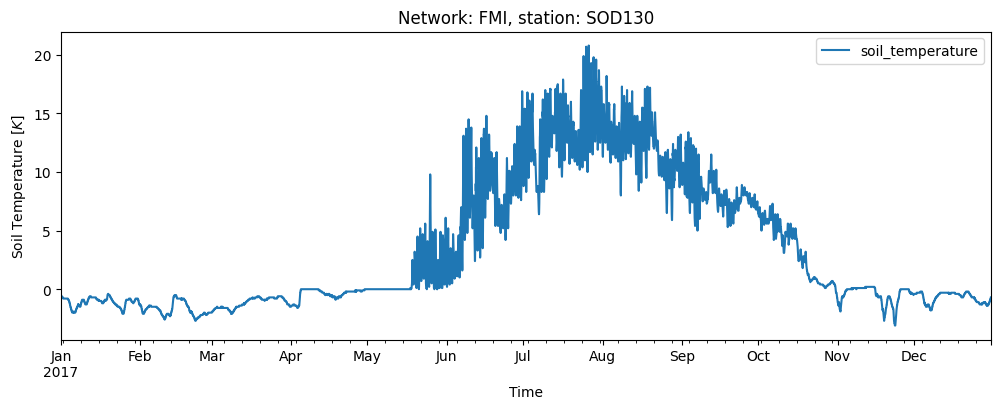

In [5]:

timeseries = ismn_data[network][station][sensor]
print(timeseries.metadata.to_pd())
ax = timeseries.data.plot(figsize=(12,4))
ax.set_xlabel("Time")
ax.set_ylabel("Soil Temperature [$K$]")
plt.title (f"Network: {network}, station: {station}")

In [16]:
# We can filter the data to pick a specific variable

ids = ismn_data.get_dataset_ids(variable='soil_temperature',
                                max_depth=0.05,
                                min_depth= 0.01,
                                # filter_meta_dict={'lc_2005': 130, 'climate_KG': 'Csb'}
                                )
len(ids)

488

In [35]:
conditions = (ismn_data.metadata['variable'].val == 'soil_temperature') & \
             (ismn_data.metadata['instrument'].depth_to <= 1) & \
             (ismn_data.metadata['lc_2005'].val == 130) & \
             (ismn_data.metadata['climate_KG'].val == 'Csb')

ismn_data.metadata[conditions].index.to_list()

[6333,
 6335,
 6337,
 6339,
 8116,
 8118,
 8120,
 8333,
 8335,
 8337,
 8339,
 10604,
 10605,
 10606,
 10607,
 10608]

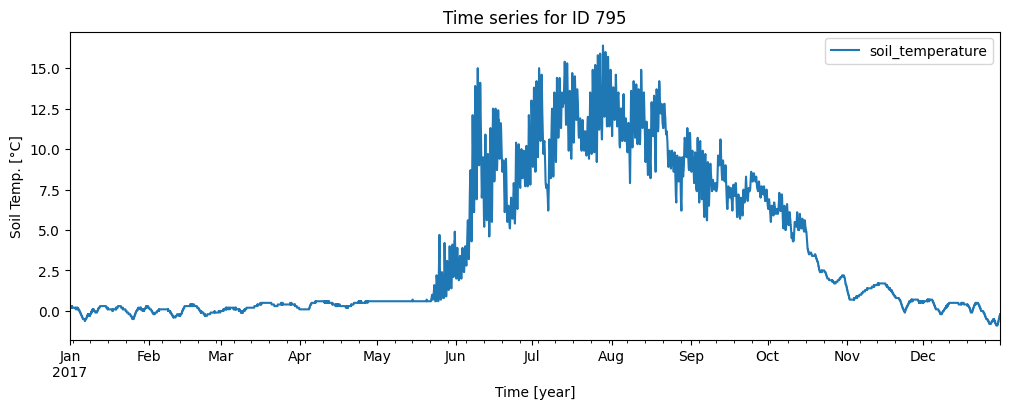

In [17]:
ts, meta = ismn_data.read(ids[88], return_meta=True)
ax = ts.plot(figsize=(12,4), title=f'Time series for ID {ids[88]}', xlabel="Time [year]", ylabel="Soil Temp. [°C]")

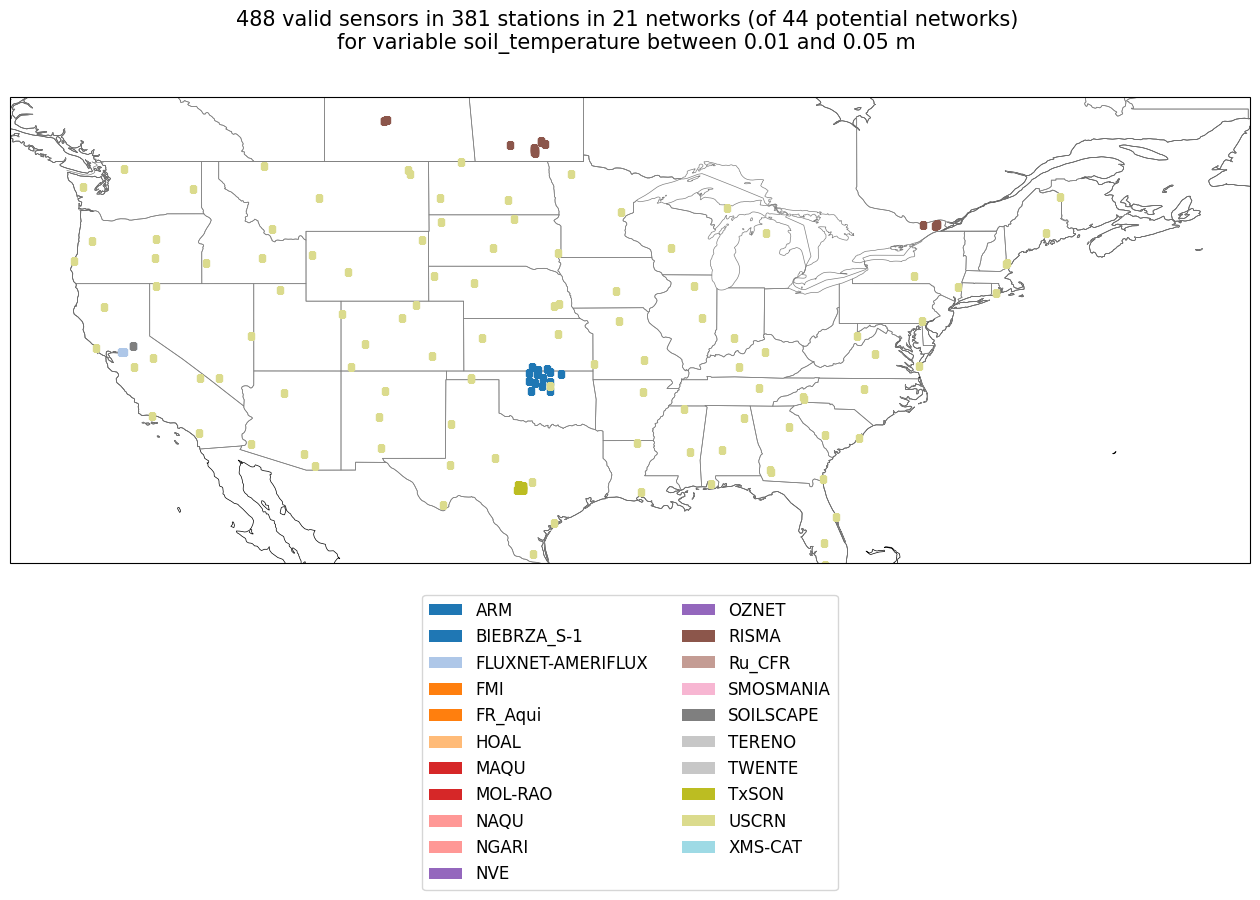

In [28]:
# We can even plot station locations 
import cartopy.crs as ccrs
#plot available station on a map
fig, ax = plt.subplots(1, 1, figsize=(16,10), subplot_kw={'projection': ccrs.PlateCarree()})
ismn_data.plot_station_locations('soil_temperature', min_depth=0.01, max_depth=0.05, ax=ax, markersize=5, text_scalefactor=3)
ax.set_extent([-128, -57, 26, 47]) # US aproximate coordinate range
plt.show()

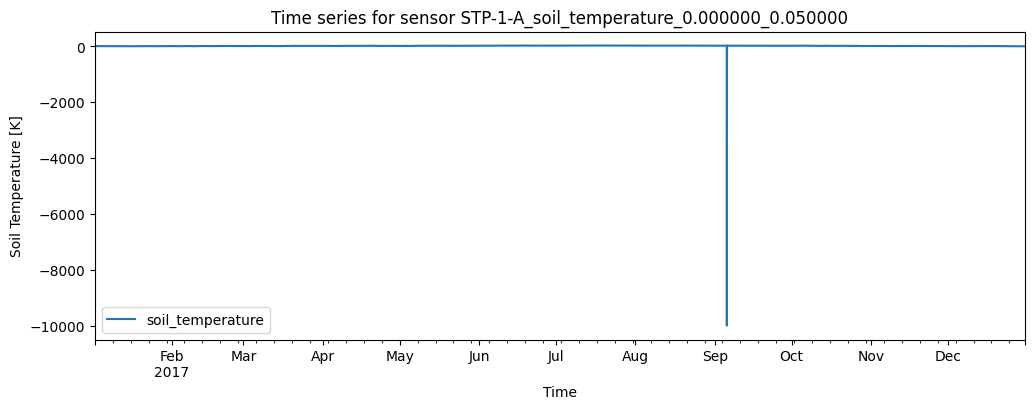

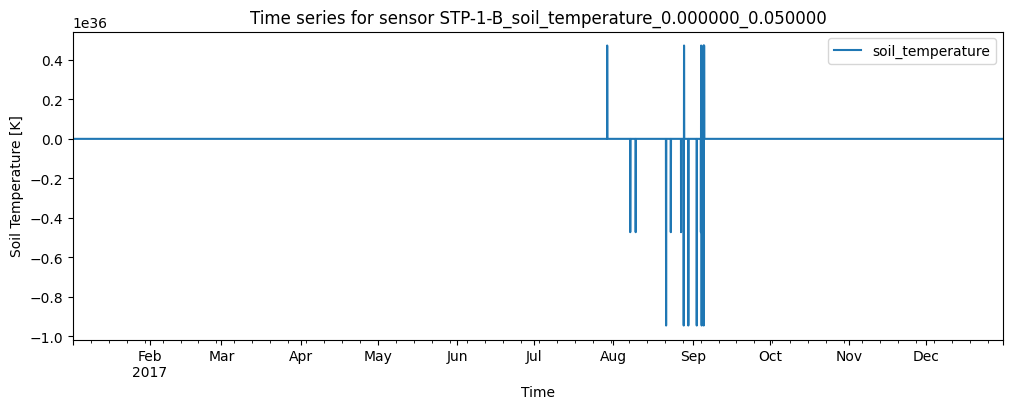

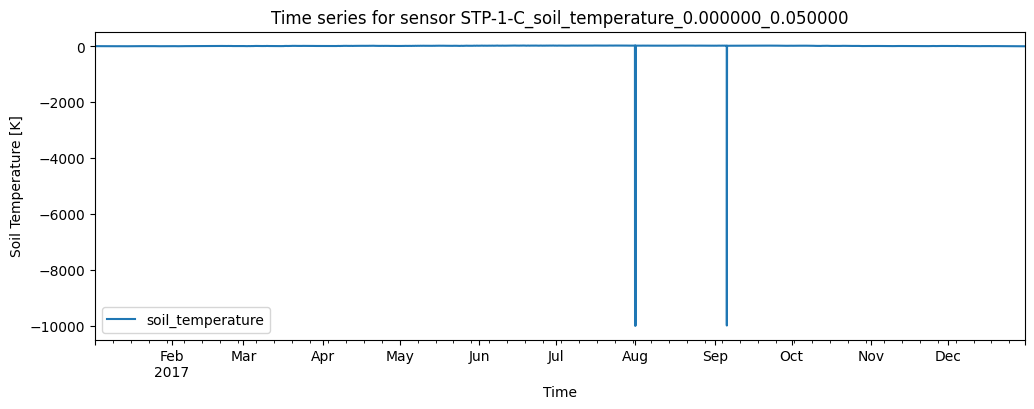

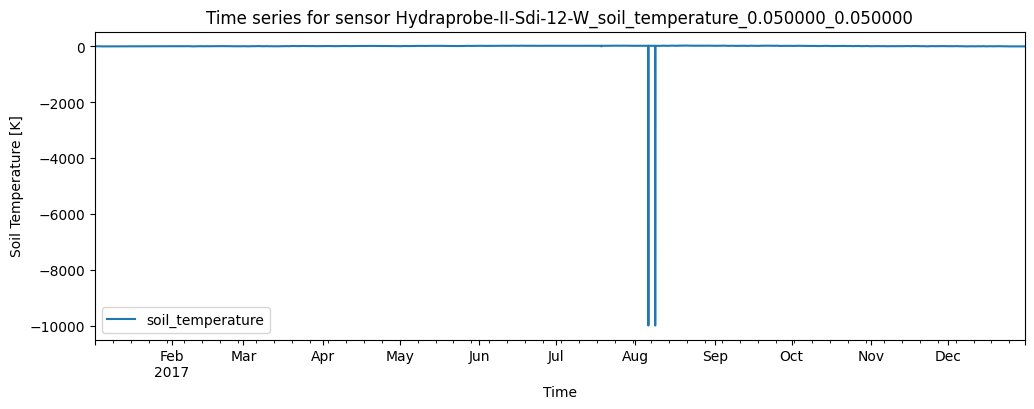

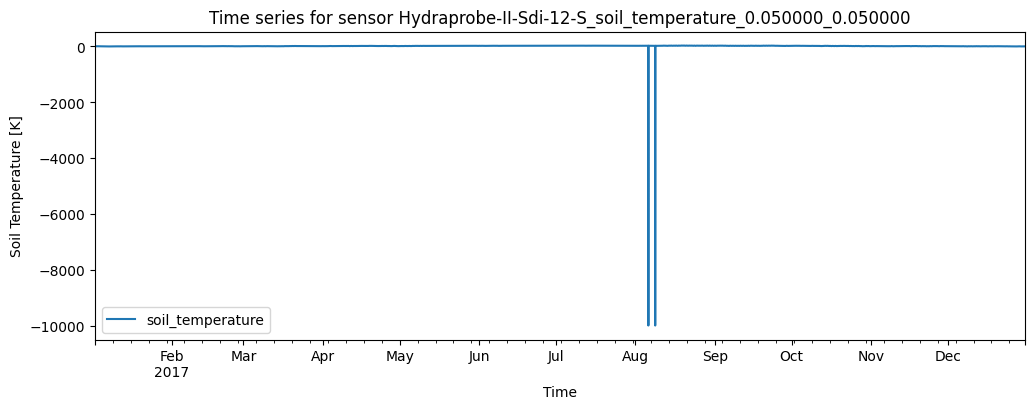

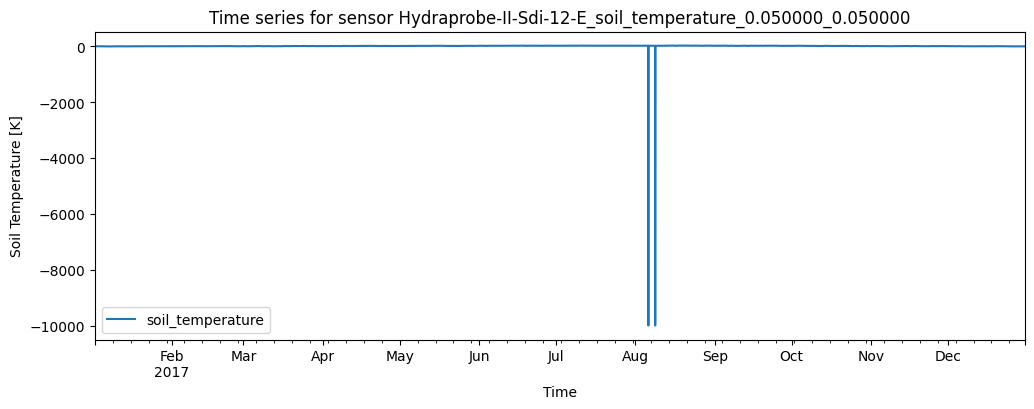

In [5]:
# Iteration over a set of sensors
i=0
for network, station, sensor in ismn_data.collection.iter_sensors(variable='soil_temperature',
                                                                  depth=[0., 0.05], ):
    # display(network)
    # display(station)
    # display(sensor)

    # print('\033[1m' + f'Metadata for sensor {sensor}:'+ '\033[0m')
    # display(sensor.metadata.to_pd())
    ax = sensor.data.plot(figsize=(12,4), title=f'Time series for sensor {sensor.name}')
    ax.set_xlabel("Time")
    ax.set_ylabel("Soil Temperature [K]")
    i +=1
    if i > 5:
        break  # for this example we stop after the first sensor

In [7]:
# Collect the lat-lon grid 
import pandas as pd
grid = ismn_data.collection.grid
gpis, lons, lats = grid.get_grid_points()
pd.DataFrame(index=pd.Index(gpis, name='gpi'),
             data={'lon': lons, 'lat': lats}).T

# Using the GPI or coordinates, a station from **all** stations in **all** networks in the collection can be selected.
station, dist = ismn_data.collection.get_nearest_station(27.0, 68.0)
print(f'Station {station.name} is {int(dist)} metres away from the passed coordinates:')

Station SAA111 is 43348 metres away from the passed coordinates:


In [8]:
# Get the network when only the station is known
network = ismn_data.network_for_station('SAA111', name_only=False)
display(network)
display(network[0][0].data)

Network 'FMI' with Stations: ['SAA111', 'SAA112', 'SAA120', 'SOD011', 'SOD012', 'SOD013', 'SOD021', 'SOD071', 'SOD072', 'SOD073', 'SOD081', 'SOD083', 'SOD091', 'SOD092', 'SOD093', 'SOD101', 'SOD102', 'SOD103', 'SOD130', 'SOD140', 'SODAWS']

,soil_moisture,soil_moisture_flag,soil_moisture_orig_flag
date_time,,,
2017-08-20 00:00:00,0.185,G,M
2017-08-20 01:00:00,0.186,G,M
2017-08-20 02:00:00,0.193,G,M
2017-08-20 03:00:00,0.214,G,M
2017-08-20 04:00:00,0.224,G,M
...,...,...,...
2017-12-30 20:00:00,0.087,"D05,D01,D02,D03",M
2017-12-30 21:00:00,0.087,"D01,D02,D03",M
2017-12-30 22:00:00,0.087,"D01,D02,D03",M


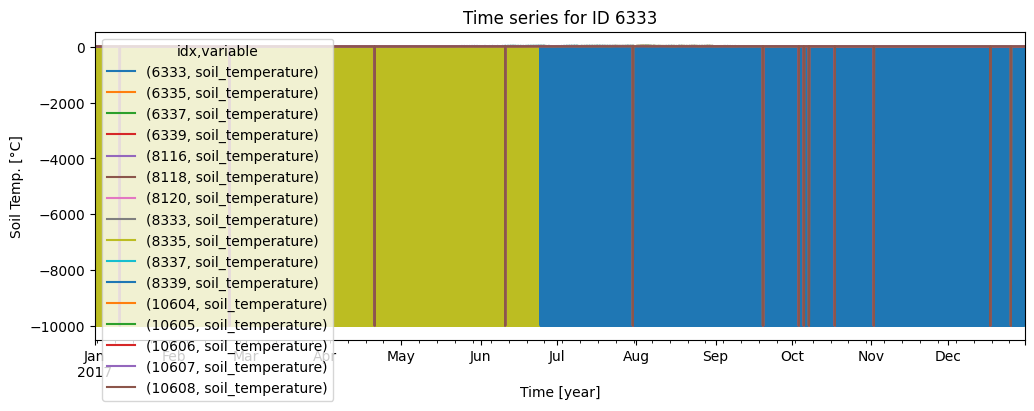

In [16]:
# Filter all stations with surface temperature between 0 and and 0.05m with a good quality flag
conditions = (ismn_data.metadata['variable'].val == 'soil_temperature') & \
             (ismn_data.metadata['instrument'].depth_to <= 1) & \
             (ismn_data.metadata['quality_flag'].val == 130) & \
             (ismn_data.metadata['climate_KG'].val == 'Csb')

ids = ismn_data.metadata[conditions].index.to_list()

ts, meta = ismn_data.read(ids, return_meta=True)
ax = ts.plot(figsize=(12,4), title=f'Time series for ID {ids[0]}', xlabel="Time [year]", ylabel="Soil Temp. [°C]")


In [5]:
ismn_data[""]

MultiIndex([( 'clay_fraction', 'depth_from'),
            ( 'clay_fraction',   'depth_to'),
            ( 'clay_fraction',        'val'),
            (    'climate_KG', 'depth_from'),
            (    'climate_KG',   'depth_to'),
            (    'climate_KG',        'val'),
            ('climate_insitu', 'depth_from'),
            ('climate_insitu',   'depth_to'),
            ('climate_insitu',        'val'),
            (     'elevation', 'depth_from'),
            (     'elevation',   'depth_to'),
            (     'elevation',        'val'),
            (    'instrument', 'depth_from'),
            (    'instrument',   'depth_to'),
            (    'instrument',        'val'),
            (      'latitude', 'depth_from'),
            (      'latitude',   'depth_to'),
            (      'latitude',        'val'),
            (       'lc_2000', 'depth_from'),
            (       'lc_2000',   'depth_to'),
            (       'lc_2000',        'val'),
            (       'lc_2005', 'de